In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
train  = pd.read_csv(r"C:\Users\esraf\Downloads\train.csv\train.csv")
test   = pd.read_csv(r"C:\Users\esraf\Downloads\test.csv\test.csv")

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.shape

(42000, 785)

In [13]:
number = np.array(train.iloc[0,1:]).reshape(28,28)
#taking 0th row and all columns except first one and converting it into numpy array.
number[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  93, 254, 253, 238, 170,  17,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=int64)

#Basically 724=28x28, that's why we use size(28,28)----to generate the image of 28x28 pixel.

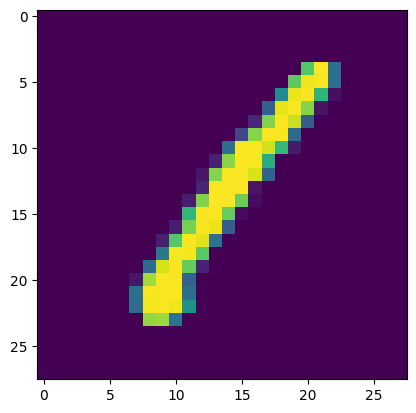

In [10]:
plt.imshow(number)
# imshow function from matplotlib.pyplot to display the 28x28 pixel image stored in number.

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

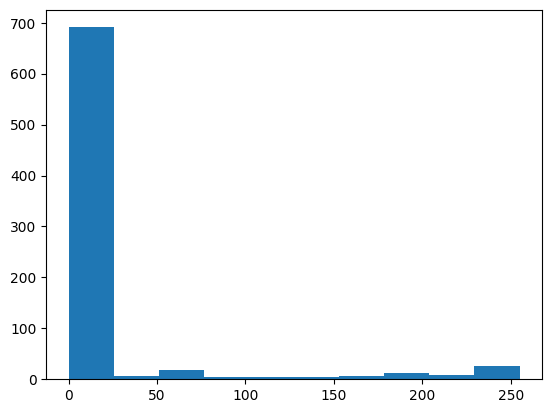

In [11]:
arr = train.iloc[3,1:]
plt.hist(arr)

plt.hist(arr): This creates a histogram of the values in arr using the hist function 

----->What does this signify?
Histogram of Pixel Values: By plotting a histogram of the pixel values, you can see the distribution of the intensity levels in the image. In the context of grayscale images:
The x-axis represents the pixel intensity values (ranging from 0 to 255).
The y-axis represents the number of pixels that have each intensity value.
Purpose and Insights
Understanding Pixel Intensity Distribution: The histogram provides insights into how the pixel values are distributed across the image. For example:

A histogram with most values around 0 would indicate a dark image.
A histogram with most values around 255 would indicate a bright image.
A histogram with a uniform distribution could indicate a high-contrast image with both dark and bright regions.
Image Characteristics: It helps in understanding the characteristics of the image, such as contrast, brightness, and how much of the image is occupied by different intensity values.

In [14]:
max(arr)

255

In [15]:
min(arr)

0

maximum and minimum pixel intensity values in that image.

intensity value typically ranging from 0 to 255 for grayscale images (0 being black and 255 being white).

## Missing values and featuring engineering

In [17]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [18]:
test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [22]:
x= np.array(train)
y=np.array(test)
X_train = x[:,1:]
Y_train = x[:,0]
#Y_train will be a vector containing the label column.
X_test = y

In [23]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

X_train.reshape(-1, 28, 28, 1): This reshapes the X_train array into the shape required for training a convolutional neural network (CNN).

"-1" ---->This parameter tells NumPy to automatically calculate the size of this dimension based on the length of the array and the size of the other dimensions. It effectively keeps the original number of samples.
"28, 28"----> These dimensions represent the height and width of the images. Here, it indicates that each image is 28x28 pixels.
"1"----> This is the number of channels. Since these are grayscale images, there is only one channel. For RGB images, this number would be 3.


Purpose and Context:-
Preparing Data for CNNs: Convolutional neural networks expect input data in a specific format, typically a 4D tensor with shape (batch_size, height, width, channels). The reshaping ensures that the data is in the correct format for the model.

Data Augmentation: the ImageDataGenerator can be used to apply random transformations (such as rotations, zooms, shifts, etc.) to the training images on the fly. This helps create a more robust model by providing a more varied set of training images without having to manually generate new images.

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(-1,28,28,1)
datagen = ImageDataGenerator(
    rotation_range = 15,
    height_shift_range = 0.1,
    zoom_range  = 0.1,
    shear_range = 0.1,
    )
datagen.fit(X_train)

In [30]:
X_train = X_train.reshape(-1,784)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Reshaping for ML Models: Flattening images (reshaping to a 1D vector) is necessary when using many machine learning algorithms or neural networks that require input in this format.

## Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
#n_neighbors=5, meaning it will consider the 5 nearest neighbors when making predictions.
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [32]:
int(knn.predict(X_test[60].reshape(1,-1)))
##predicted the output from one of the inputs from test data set.

C:\Users\esraf\AppData\Local\Temp\ipykernel_2008\3513341821.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(X_test[60].reshape(1,-1)))


4

method predicts the class labels for the input samples.
Here, it predicts the class label for the reshaped X_test[60] sample.

int(...)--->
This converts the predicted class label (which is typically returned as a NumPy array or a list) into an integer.
The prediction itself is a single element, the predicted class label for the input sample.

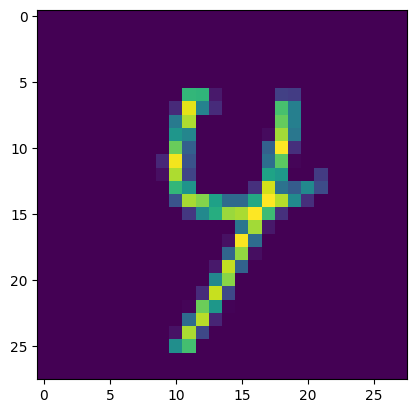

In [33]:
num = np.array(test.iloc[60,:]).reshape(28,28)
plt.imshow(num)
##here we can see w are getting correct result.

C:\Users\esraf\AppData\Local\Temp\ipykernel_2008\2485765367.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_for_45th_row=int(knn.predict(X_test[45].reshape(1,-1)))


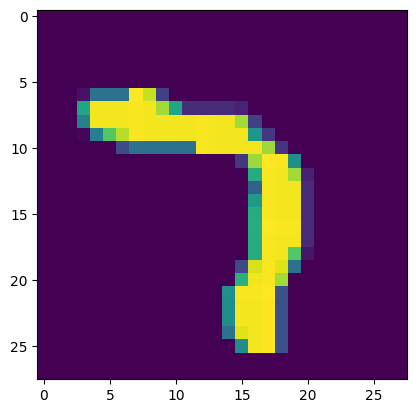

In [41]:
prediction_for_45th_row=int(knn.predict(X_test[45].reshape(1,-1)))

num = np.array(test.iloc[45,:]).reshape(28,28)
plt.imshow(num)

In [42]:
predicted_for_45th_row

7